# **Table of Contents**

* [OLS](#section_20)
* [Drop + OLS](#section_21)

* [Assumption Testing](#section_22)
    * [Normality](#section_23)
    * [Multi-collinearity](#section_24)
    * [Homo-scedasticity](#section_25)
    * [Auto-correlation](#section_26)
    * [Linearity](#section_27)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import scipy.stats       as stats

import warnings
warnings.simplefilter ('ignore')

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

df  =  pd.DataFrame ( boston.data,   columns = boston.feature_names )

df['Price']     =   boston.target

df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37,20.4
294,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40,21.7
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0


**Target Col is Price**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

<a id='section_20'></a>
# Part 1 - **OLS**

In [5]:
import statsmodels.api as sm

In [6]:
y  =  df['Price']
x  =  df.drop('Price', axis=1)
xc =  sm.add_constant(x)

In [7]:
model = sm.OLS(y,xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        21:54:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Comments :

        * R2 = 0.741
        * So, 74.1% variation in Y is accounted by Xs

> Inference :

        *  When   Crime inc by 1 unit ,        Price dec by 0.1 unit
        *  When   House near Charles river,    Price inc by 2.6 unit
        *  When   Distance inc by 1 unit ,     Price dec by 1.4 unit

<a id='section_21'></a>
# **Drop + OLS**

In [8]:
y   =  df['Price']
x   =  df.drop( ['Price','INDUS','AGE'] , axis=1)                # insig cols
xc  =  sm.add_constant(x)

In [9]:
model  =  sm.OLS(y,xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          5.54e-137
Time:                        21:54:12   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='section_22'></a>
# Part 2 - **Assumption Testing**

<a id='section_23'></a>
# **1. Normality**

In [10]:
residuals  =  model.resid
residuals

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64

### **1.1 - Graphical**

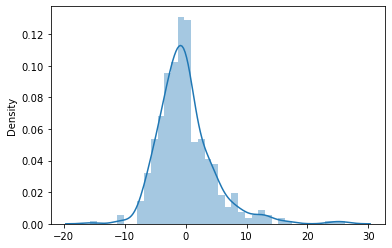

In [11]:
sns.distplot (residuals) ;

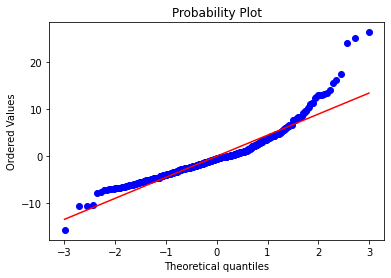

In [12]:
stats.probplot (residuals ,  plot=plt)
plt.show()

### **1.2 - Numerical**

In [13]:
stats.jarque_bera (residuals)

(787.7851418746526, 0.0)

>Comments :

        * test statistic , p-value
        * Residuals not normal
        * To achieve normal dist of residuals , apply boxcox transformation on target col.

<a id='section_24'></a>
# **2. Multi-collinearity**

### **2.1 - Graphical**

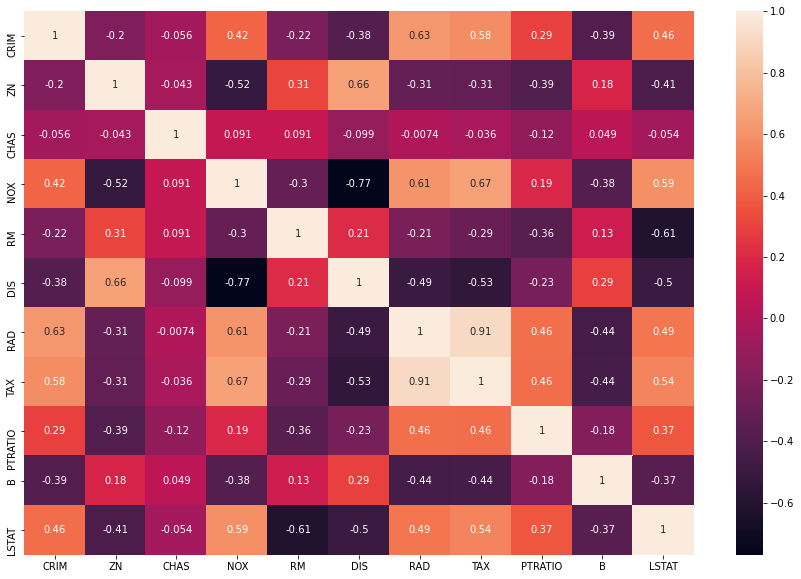

In [14]:
plt.figure  (figsize = (15,10))

sns.heatmap (x.corr()  ,  annot=True) ;

### **2.1 - Numerical**

### Overall

In [21]:
model.condition_number

14685.353729117927

> Comments
    
        * < 100 .... ..... little MC
        * 100 to 1000 .... moderate MC
        * > 1000 ......... severe MC

### Individual

In [15]:
from   statsmodels.stats.outliers_influence   import   variance_inflation_factor   as   vif

score  =  [   vif (xc.values, i)        for i in  range(xc.shape[1])     ]

MC     =  pd.DataFrame (  {'VIF':score}  ,   index = xc.columns  )

MC.sort_values (by='VIF',ascending=False)

,VIF
const,579.255845
TAX,7.272386
RAD,6.861126
NOX,3.778011
DIS,3.443420
LSTAT,2.581984
ZN,2.239229
RM,1.834806
CRIM,1.789704
PTRATIO,1.757681


> Comments :
    
        * Drop cols 1 by 1 , according to highest VIF value
        * After each drop , fit & recheck VIF
        * Process is continued untill there is no relationship between input variables.

<a id='section_25'></a>
# **3. Homo-scedasticity**

### **3.1 - Numerical**

In [16]:
import statsmodels.stats.api as sms

sms.het_goldfeldquandt ( y=residuals , x=xc )

(2.283670708634397, 1.3454126630538586e-10, 'increasing')

> Comments :
        
        * H0 : Equal var of residuals
        * H1 : Unequal var of residuals
        * Output : test_statistic , p-value 
> Obs :
        
        * P < alpha
        * Reject Null
        * Unequal variance of residuals 

<a id='section_26'></a>
# **4. Auto-correlation**

### **4.1 - Graphical**

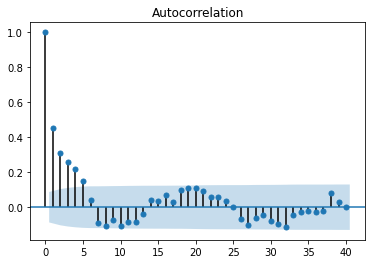

In [17]:
import  statsmodels.tsa.api   as  smt

smt.graphics.plot_acf (residuals,  lags=40)

plt.show()

### **4.2 - Numerical**

In [18]:
from  statsmodels.stats.stattools  import  durbin_watson

durbin_watson (residuals)

1.0778750022758044

* Weak auto-corr

> Comments
    
        * near to 2 ..... no autocorrelation
        * 0 to 2 ..... positive autocorrelation
        * 2 to 4 ..... negative autocorrelation

<a id='section_27'></a>
# **5. Linearity**

### **5.1 - Numerical**

In [19]:
import statsmodels.stats.api  as  sms

sms.diagnostic.linear_rainbow (model)

(0.5781612495333305, 0.9999908142705343)

> Comments :
        
        * H0 : Reg is Linear
        * H1 : Reg is not Linear.
        * Output : test_statistic , p-value 
> Obs :
        
        * P > alpha
        * Accept Null
        * Reg is Linear